In [2]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import json

In [3]:
# Make a reference to the Chicago_Energy_Benchmarking_20240408.csv file path
csv_path = Path("Chicago_Energy_Benchmarking_20240408.csv")

# Import the Chicago_Energy_Benchmarking_202404.csv file as a DataFrame
df = pd.read_csv(csv_path, encoding="utf-8")

# Check the data imported correctly
df.head()

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID
0,2020,252064,Mansueto Library,Submitted Data,1100 E 57th St,60637,2.0,False,HYDE PARK,Library,...,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950,"(41.79221307, -87.59994981)",2020-252064
1,2020,232458,Harper Square Cooperative,Submitted Data,4800 - 4850 S Lake Park Ave,60615,1.0,False,KENWOOD,Multifamily Housing,...,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264,"(41.80747487, -87.59126397)",2020-232458
2,2020,254616,Former Coyne College,Submitted Data,330 N Green St,60607,2.0,False,NEAR WEST SIDE,Office,...,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021,"(41.873335, -87.65102071)",2020-254616
3,2020,103812,400 W Superior St,Submitted Data,400 W Superior St,60654,3.0,False,NEAR NORTH SIDE,Office,...,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901,"(41.89575232, -87.638901)",2020-103812
4,2020,254073,Blue Moon Lofts,Submitted Data,215 N. Aberdeen St.,60607,4.0,False,NEAR WEST SIDE,Multifamily Housing,...,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175,"(41.87429514, -87.65017516)",2020-254073


In [4]:
#Idenitfy the names of all the columns
df.columns

Index(['Data Year', 'ID', 'Property Name', 'Reporting Status', 'Address',
       'ZIP Code', 'Chicago Energy Rating',
       'Exempt From Chicago Energy Rating', 'Community Area',
       'Primary Property Type', 'Gross Floor Area - Buildings (sq ft)',
       'Year Built', '# of Buildings', 'Water Use (kGal)', 'ENERGY STAR Score',
       'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)',
       'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)',
       'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)',
       'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)',
       'Weather Normalized Source EUI (kBtu/sq ft)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'GHG Intensity (kg CO2e/sq ft)', 'Latitude', 'Longitude', 'Location',
       'Row_ID'],
      dtype='object')

In [5]:
#Finding the min and max year
min_year= df['Data Year'].min()
max_year= df['Data Year'].max()
print(min_year)
print(max_year)

2014
2022


In [6]:
# Finding the energy rating
min_rate= df['Chicago Energy Rating'].min()
max_rate= df['Chicago Energy Rating'].max()
print(min_rate)
print(max_rate)

0.0
4.0


In [7]:
#Seperating the data frames into different year
df_22= df[df['Data Year'] == 2022]
df_21= df[df['Data Year'] == 2021]
df_20= df[df['Data Year'] == 2020]
df_19= df[df['Data Year'] == 2019]
df_18= df[df['Data Year'] == 2018]
df_17= df[df['Data Year'] == 2017]
df_16= df[df['Data Year'] == 2016]
df_14= df[df['Data Year'] == 2014]


In [64]:
#Cleaned Data

exemptdf= df[df['Exempt From Chicago Energy Rating']== False]
exempt= exemptdf.drop_duplicates(subset= ['Address'])
cleaned= exempt.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
q1= cleaned['Site EUI (kBtu/sq ft)'].quantile(0.25)
q3= cleaned['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq= q3- q1

low= q1- 1.5*iq
high= q3+ 1.5 *iq

filter = cleaned[(cleaned['Site EUI (kBtu/sq ft)'] >= low) & (cleaned['Site EUI (kBtu/sq ft)'] <= high)]

reduced_df = filter[["Data Year", "ID", "Property Name", "Address", "Chicago Energy Rating", "Exempt From Chicago Energy Rating",
"Community Area", "Primary Property Type", "Gross Floor Area - Buildings (sq ft)", "Year Built", "Electricity Use (kBtu)",
 "Natural Gas Use (kBtu)","Site EUI (kBtu/sq ft)", "Source EUI (kBtu/sq ft)", "Weather Normalized Site EUI (kBtu/sq ft)",
 "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", "GHG Intensity (kg CO2e/sq ft)", 
 "Latitude", "Longitude"]]
reduced_df



,Data Year,ID,Property Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
1,2020,232458,Harper Square Cooperative,4800 - 4850 S Lake Park Ave,1.0,False,KENWOOD,Multifamily Housing,627680.0,1974.0,16397682.8,43537490.6,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264
2,2020,254616,Former Coyne College,330 N Green St,2.0,False,NEAR WEST SIDE,Office,555524.0,2019.0,28606427.7,2199940.1,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021
3,2020,103812,400 W Superior St,400 W Superior St,3.0,False,NEAR NORTH SIDE,Office,130007.0,1998.0,6489281.3,1493523.2,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901
4,2020,254073,Blue Moon Lofts,215 N. Aberdeen St.,4.0,False,NEAR WEST SIDE,Multifamily Housing,83000.0,1908.0,1614582.3,825006.6,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175
5,2020,254385,"Ambulatory Care Center, St. Bernard Hospital",6307 S STEWART AVE,2.5,False,Englewood,Medical Office,98018.0,2016.0,4204723.5,2236782.3,96.7,211.9,98.0,212.8,775.0,11.6,41.773912,-87.638721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24549,2022,256888,NaN,318 N CARPENTER ST,4.0,False,NaN,Office,104849.0,2019.0,1669219.6,1726089.1,32.4,61.9,32.8,61.4,311.5,3.0,41.887365,-87.653505
24601,2022,256965,NaN,3436 N Osceola Avenue,1.5,False,NaN,K-12 School,66250.0,1935.0,1666209.3,3767970.1,82.0,130.1,85.4,133.7,419.6,6.3,41.942543,-87.813168
24768,2022,256955,NaN,3141 N Sheffield Ave,1.5,False,NaN,Multifamily Housing,72570.0,2000.0,2356054.5,3132686.1,75.6,136.2,77.4,136.5,476.7,6.6,41.939265,-87.653937
24777,2022,257035,NaN,2929 W 83rd St,4.0,False,NaN,K-12 School,85634.0,1958.0,628040.0,1180190.0,21.1,35.0,21.8,35.7,145.4,1.7,41.742489,-87.696003


In [10]:
#Cleaning out building that did not have to report

exempt22_df= df_22[df_22['Exempt From Chicago Energy Rating']== False]
exempt21_df= df_21[df_21['Exempt From Chicago Energy Rating']== False]
exempt20_df= df_20[df_20['Exempt From Chicago Energy Rating']== False]
exempt19_df= df_19[df_19['Exempt From Chicago Energy Rating']== False]
exempt18_df= df_18[df_18['Exempt From Chicago Energy Rating']== False]
exempt17_df= df_17[df_17['Exempt From Chicago Energy Rating']== False]
exempt16_df= df_16[df_16['Exempt From Chicago Energy Rating']== False]



In [13]:
#Dropping dublicate buildings
exempt22= exempt22_df.drop_duplicates(subset= ['Address'])
exempt21= exempt21_df.drop_duplicates(subset= ['Address'])
exempt20= exempt20_df.drop_duplicates(subset= ['Address'])
exempt19= exempt19_df.drop_duplicates(subset= ['Address'])
exempt18= exempt18_df.drop_duplicates(subset= ['Address'])
exempt17= exempt17_df.drop_duplicates(subset= ['Address'])
exempt16= exempt16_df.drop_duplicates(subset= ['Address'])


In [18]:
#Dropping if either are empty
cleaned22= exempt22.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
cleaned21= exempt21.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
cleaned20= exempt20.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
cleaned19= exempt19.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
cleaned18= exempt18.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
cleaned17= exempt17.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
cleaned16= exempt16.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])


In [19]:
#Getting rid of the outliers in the data set
q122= cleaned22['Site EUI (kBtu/sq ft)'].quantile(0.25)
q322= cleaned22['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq22= q322- q122

low22= q122- 1.5*iq22
high22= q322+ 1.5 *iq22

filter22 = cleaned22[(cleaned22['Site EUI (kBtu/sq ft)'] >= low22) & (cleaned22['Site EUI (kBtu/sq ft)'] <= high22)]

In [22]:
q121= cleaned22['Site EUI (kBtu/sq ft)'].quantile(0.25)
q321= cleaned22['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq21= q321- q121

low21= q121- 1.5*iq21
high21= q321+ 1.5 *iq21

filter21 = cleaned21[(cleaned21['Site EUI (kBtu/sq ft)'] >= low21) & (cleaned21['Site EUI (kBtu/sq ft)'] <= high21)]

In [23]:
q120= cleaned20['Site EUI (kBtu/sq ft)'].quantile(0.25)
q320= cleaned20['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq20= q320- q120

low20= q120- 1.5*iq20
high20= q320+ 1.5 *iq20

filter20 = cleaned20[(cleaned20['Site EUI (kBtu/sq ft)'] >= low20) & (cleaned20['Site EUI (kBtu/sq ft)'] <= high20)]

In [27]:
q119= cleaned19['Site EUI (kBtu/sq ft)'].quantile(0.25)
q319= cleaned19['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq19= q319- q119

low19= q119- 1.5*iq19
high19= q319+ 1.5 *iq19

filter19 = cleaned19[(cleaned19['Site EUI (kBtu/sq ft)'] >= low19) & (cleaned19['Site EUI (kBtu/sq ft)'] <= high19)]


In [21]:
q118= cleaned18['Site EUI (kBtu/sq ft)'].quantile(0.25)
q318= cleaned18['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq18= q318- q118

low18= q118- 1.5*iq18
high18= q318+ 1.5 *iq18

filter18 = cleaned18[(cleaned18['Site EUI (kBtu/sq ft)'] >= low18) & (cleaned18['Site EUI (kBtu/sq ft)'] <= high18)]


In [28]:
q117= cleaned17['Site EUI (kBtu/sq ft)'].quantile(0.25)
q317= cleaned17['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq17= q317- q117

low17= q117- 1.5*iq17
high17= q317+ 1.5 *iq17

filter17 = cleaned17[(cleaned17['Site EUI (kBtu/sq ft)'] >= low17) & (cleaned17['Site EUI (kBtu/sq ft)'] <= high17)]

In [30]:
q116= cleaned16['Site EUI (kBtu/sq ft)'].quantile(0.25)
q316= cleaned16['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq16= q316- q116

low16= q116- 1.5*iq16
high16= q316+ 1.5 *iq16

filter16 = cleaned16[(cleaned16['Site EUI (kBtu/sq ft)'] >= low16) & (cleaned16['Site EUI (kBtu/sq ft)'] <= high16)]

In [31]:
fivestar22= filter22[filter22['Chicago Energy Rating']== 5].count()['Chicago Energy Rating']
fourstar22= filter22[filter22['Chicago Energy Rating']== 4].count()['Chicago Energy Rating']
threestar22= filter22[filter22['Chicago Energy Rating']== 3].count()['Chicago Energy Rating']
twotar22= filter22[filter22['Chicago Energy Rating']== 2].count()['Chicago Energy Rating']
onestar22= filter22[filter22['Chicago Energy Rating']== 1].count()['Chicago Energy Rating']
zerostar22= filter22[filter22['Chicago Energy Rating']== 0].count()['Chicago Energy Rating']

In [32]:
fivestar21= filter21[filter21['Chicago Energy Rating']== 5].count()['Chicago Energy Rating']
fourstar21= filter21[filter21['Chicago Energy Rating']== 4].count()['Chicago Energy Rating']
threestar21= filter21[filter21['Chicago Energy Rating']== 3].count()['Chicago Energy Rating']
twotar21= filter21[filter21['Chicago Energy Rating']== 2].count()['Chicago Energy Rating']
onestar21= filter21[filter21['Chicago Energy Rating']== 1].count()['Chicago Energy Rating']
zerostar21= filter21[filter21['Chicago Energy Rating']== 0].count()['Chicago Energy Rating']

In [40]:
fivestar20= filter20[filter20['Chicago Energy Rating']== 5].count()['Chicago Energy Rating']
fourstar20= filter20[filter20['Chicago Energy Rating']== 4].count()['Chicago Energy Rating']
threestar20= filter20[filter20['Chicago Energy Rating']== 3].count()['Chicago Energy Rating']
twotar20= filter20[filter20['Chicago Energy Rating']== 2].count()['Chicago Energy Rating']
onestar20= filter20[filter20['Chicago Energy Rating']== 1].count()['Chicago Energy Rating']
zerostar20= filter20[filter20['Chicago Energy Rating']== 0].count()['Chicago Energy Rating']
fivestar20

0

In [34]:
fivestar19= filter19[filter19['Chicago Energy Rating']== 5].count()['Chicago Energy Rating']
fourstar19= filter19[filter19['Chicago Energy Rating']== 4].count()['Chicago Energy Rating']
threestar19= filter19[filter19['Chicago Energy Rating']== 3].count()['Chicago Energy Rating']
twotar19= filter19[filter19['Chicago Energy Rating']== 2].count()['Chicago Energy Rating']
onestar19= filter19[filter19['Chicago Energy Rating']== 1].count()['Chicago Energy Rating']
zerostar19= filter19[filter19['Chicago Energy Rating']== 0].count()['Chicago Energy Rating']

In [35]:
fivestar18= filter18[filter18['Chicago Energy Rating']== 5].count()['Chicago Energy Rating']
fourstar18= filter18[filter18['Chicago Energy Rating']== 4].count()['Chicago Energy Rating']
threestar18= filter18[filter18['Chicago Energy Rating']== 3].count()['Chicago Energy Rating']
twotar18= filter18[filter18['Chicago Energy Rating']== 2].count()['Chicago Energy Rating']
onestar18= filter18[filter18['Chicago Energy Rating']== 1].count()['Chicago Energy Rating']
zerostar18= filter18[filter18['Chicago Energy Rating']== 0].count()['Chicago Energy Rating']


In [36]:
fivestar17= filter17[filter17['Chicago Energy Rating']== 5].count()['Chicago Energy Rating']
fourstar17= filter17[filter17['Chicago Energy Rating']== 4].count()['Chicago Energy Rating']
threestar17= filter17[filter17['Chicago Energy Rating']== 3].count()['Chicago Energy Rating']
twotar17= filter17[filter17['Chicago Energy Rating']== 2].count()['Chicago Energy Rating']
onestar17= filter17[filter17['Chicago Energy Rating']== 1].count()['Chicago Energy Rating']
zerostar17= filter17[filter17['Chicago Energy Rating']== 0].count()['Chicago Energy Rating']

In [37]:
fivestar16= filter16[filter16['Chicago Energy Rating']== 5].count()['Chicago Energy Rating']
fourstar16= filter16[filter16['Chicago Energy Rating']== 4].count()['Chicago Energy Rating']
threestar16= filter16[filter16['Chicago Energy Rating']== 3].count()['Chicago Energy Rating']
twotar16= filter16[filter16['Chicago Energy Rating']== 2].count()['Chicago Energy Rating']
onestar16= filter16[filter16['Chicago Energy Rating']== 1].count()['Chicago Energy Rating']
zerostar16= filter16[filter16['Chicago Energy Rating']== 0].count()['Chicago Energy Rating']

In [103]:
#Dataframe by year and star rating
stars22= pd.DataFrame({
    #'5 Star': [fivestar17,fivestar18,fivestar19, fivestar20, fivestar21, fivestar22],
    '4 Star': [fourstar17,fourstar18, fourstar19,fourstar20, fourstar21,fourstar22 ],
    '3 Star': [threestar17,threestar18, threestar19, threestar20, threestar21, threestar22],
    '2 Stars': [ twotar17,twotar18, twotar19, twotar20, twotar21, twotar22], 
    '1 Star': [ onestar17,onestar18, onestar19, onestar20, onestar21, onestar22],
    '0 Star': [ zerostar17,zerostar18, zerostar19, zerostar20, zerostar21, zerostar22]
})

stars = stars22.rename(index={ 0: "", 1: 2018, 2: 2019, 3: 2020, 4: 2021, 5: 2022})
stars



,4 Star,3 Star,2 Stars,1 Star,0 Star
,0,0,0,0,0
2018,835,313,324,435,37
2019,612,237,250,297,2
2020,1172,311,281,272,0
2021,893,297,225,329,0
2022,810,294,287,339,1


<Axes: title={'center': 'Energy Rating'}>

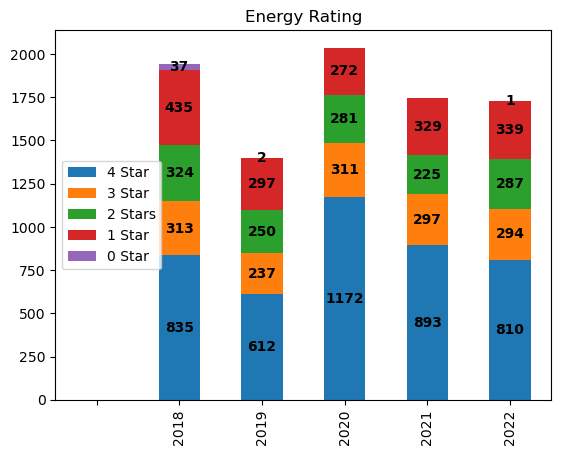

In [107]:

ax = stars.plot.bar(stacked=True)
#Looked up the code from Stackoverflow (https://stackoverflow.com/questions/51046983/show-the-value-on-the-each-color-of-stacked-bar-chart-from-a-different-column-of)
ax.set_title( "Energy Rating")
ax.legend(loc='center left')
for rect in ax.patches:
    # Get the position and height from the bar
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height() / 2 + rect.get_y()
    value = rect.get_height()
    # Check 
    if value > 0:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center', color='black', fontweight='bold')

ax



In [57]:
# To aggregate Primary Property types into Building Sectors, first create lists that include the property types 
# for each building sector, with building sectors as names

office = ["Bank Branch", "Financial Office", "Office"]
multifamily_housing = ["Multifamily Housing"]
schools = ["K-12 School"]
healthcare = ["Ambulatory Surgical Center",  "Outpatient Rehabilitation/Physical Therapy", "Urgent Care", "Clinic", 
              "Other Outpatient", "Hospital (General Medical & Surgical)", "Medical Office", "Other - Specialty Hospital"]
college_university = ["College/University"]
lodging = ["Hotel", "Residential Care Facility", "Senior Care Community", "Residence Hall/Dormitory", 
           "Other - Lodging/Residential"]
retail = ["Automobile Dealership", "Enclosed Mall", "Other - Mall", "Lifestyle Center", "Strip Mall", "Retail Store", 
          "Supermarket/Grocery Store", "Wholesale Club/Supercenter", "Other - Services", "Repair Services"]


In [60]:
# Create an empty list to put the building sector results in
building_sectors = []

# use a for loop to create a list Building Sectors for each row
for type in reduced_df["Primary Property Type"]:
    if type in office:
        building_sectors.append("Office")
    elif type in multifamily_housing:
        building_sectors.append("Multifamily Housing")
    elif type in schools:
        building_sectors.append("K-12 Schools")
    elif type in healthcare:
        building_sectors.append("Healthcare")
    elif type in college_university:
        building_sectors.append("College/University")
    elif type in lodging:
        building_sectors.append("Lodging")
    elif type in retail:
        building_sectors.append("Retail")
    else:
        building_sectors.append("Other")


print(len(building_sectors))

w_sectors_df= reduced_df.assign(Building_Sector=building_sectors)

w_sectors_df.tail()

4915


,Data Year,ID,Property Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,...,Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Building_Sector
24549,2022,256888,NaN,318 N CARPENTER ST,4.0,False,NaN,Office,104849.0,2019.0,...,1726089.1,32.4,61.9,32.8,61.4,311.5,3.0,41.887365,-87.653505,Office
24601,2022,256965,NaN,3436 N Osceola Avenue,1.5,False,NaN,K-12 School,66250.0,1935.0,...,3767970.1,82.0,130.1,85.4,133.7,419.6,6.3,41.942543,-87.813168,K-12 Schools
24768,2022,256955,NaN,3141 N Sheffield Ave,1.5,False,NaN,Multifamily Housing,72570.0,2000.0,...,3132686.1,75.6,136.2,77.4,136.5,476.7,6.6,41.939265,-87.653937,Multifamily Housing
24777,2022,257035,NaN,2929 W 83rd St,4.0,False,NaN,K-12 School,85634.0,1958.0,...,1180190.0,21.1,35.0,21.8,35.7,145.4,1.7,41.742489,-87.696003,K-12 Schools
24825,2022,256879,NaN,2755 N MILWAUKEE AVE,4.0,False,NaN,Multifamily Housing,72000.0,2021.0,...,2833709.2,52.0,76.7,55.0,79.8,270.2,3.8,41.931312,-87.710853,Multifamily Housing


In [63]:
office= w_sectors_df[w_sectors_df['Primary Property Type']== 'Office' ]
office

,Data Year,ID,Property Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,...,Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Building_Sector
2,2020,254616,Former Coyne College,330 N Green St,2.0,False,NEAR WEST SIDE,Office,555524.0,2019.0,...,2199940.1,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021,Office
3,2020,103812,400 W Superior St,400 W Superior St,3.0,False,NEAR NORTH SIDE,Office,130007.0,1998.0,...,1493523.2,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901,Office
16,2020,101722,500 W Monroe,500 W Monroe,1.0,False,NEAR WEST SIDE,Office,1554884.0,1992.0,...,NaN,85.5,239.3,92.1,257.8,15316.5,13.3,41.880609,-87.639778,Office
21,2020,101910,Michael A. Bilandic Building,160 N LaSalle St,4.0,False,LOOP,Office,464498.0,1920.0,...,12600101.5,55.2,107.1,57.7,109.8,2705.3,5.8,41.884744,-87.632496,Office
42,2020,101961,Inland Steel Building,30 W Monroe,3.0,False,LOOP,Office,311003.0,1958.0,...,19525200.4,93.6,148.7,98.4,153.7,2388.5,7.9,41.881090,-87.628589,Office
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22645,2022,256877,NaN,167 N GREEN ST,4.0,False,NaN,Office,677417.0,2020.0,...,6797765.7,42.2,100.7,42.6,101.1,3235.4,4.8,41.885044,-87.648476,Office
22725,2022,256900,NaN,320 N SANGAMON ST,4.0,False,NaN,Office,309985.0,2021.0,...,5548432.0,37.1,72.6,36.4,69.9,1079.6,3.5,41.887419,-87.651174,Office
22947,2022,103798,Federal Railroad Retirement Board,844 W Rush St,3.0,False,NEAR NORTH SIDE,Office,383007.0,1923.0,...,21862212.1,86.1,141.3,88.8,142.1,2627.5,6.9,41.897974,-87.626338,Office
22960,2022,256834,NaN,1375 Fulton,2.5,False,NaN,Office,463854.0,2020.0,...,15263315.7,74.1,140.5,74.1,140.5,2695.4,6.8,41.886488,-87.661813,Office


In [ ]:
average_office= w_sectors_df[(w_sectors_df['Site EUI (kBtu/sq ft)']).mean()['']]

In [108]:
# Remove unnecessary columns from the DataFrame and save the new DataFrame
# Only keep: "Data Year", "ID", "Property Name", "Address", "Chicago Energy Rating", "Exempt From Chicago Energy Rating",
#"Community Area", "Primary Property Type", "Gross Floor Area - Buildings (sq ft)", "Year Built", "Electricity Use (kBtu)",
# "Natural Gas Use (kBtu)","Site EUI (kBtu/sq ft)", "Source EUI (kBtu/sq ft)", "Weather Normalized Site EUI (kBtu/sq ft)",
# "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", "GHG Intensity (kg CO2e/sq ft)", 
# "Latitude", "Longitude", 

reduced_df = df[["Data Year", "ID", "Property Name", "Address", "Chicago Energy Rating", "Exempt From Chicago Energy Rating",
"Community Area", "Primary Property Type", "Gross Floor Area - Buildings (sq ft)", "Year Built", "Electricity Use (kBtu)",
 "Natural Gas Use (kBtu)","Site EUI (kBtu/sq ft)", "Source EUI (kBtu/sq ft)", "Weather Normalized Site EUI (kBtu/sq ft)",
 "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", "GHG Intensity (kg CO2e/sq ft)", 
 "Latitude", "Longitude"]]
reduced_df.tail()

,Data Year,ID,Property Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
24886,2022,251598,Joplin Elementary -CPS,7931 S Honore St,1.0,False,AUBURN GRESHAM,K-12 School,77483.0,1957.0,2544345.5,4847890.5,95.4,157.6,99.3,161.8,592.6,7.6,41.749341,-87.669329
24887,2022,159799,Park Edgewater Condominium Association,6101 N Sheridan Road,4.0,False,EDGEWATER,Multifamily Housing,150000.0,1928.0,2019564.1,7254640.6,61.8,88.5,64.5,91.3,651.3,4.3,41.992473,-87.655312
24888,2022,105488,Lake Shore Tower Apartments,5600 N SHERIDAN RD,2.0,False,EDGEWATER,Multifamily Housing,128387.0,1965.0,2801125.0,12528588.7,124.3,170.3,129.9,175.2,1034.4,8.4,41.983886,-87.655342
24889,2022,251565,"Dixon, Arthur -CPS",8306 S St Lawrence Ave,4.0,False,CHATHAM,K-12 School,101627.0,1929.0,733952.0,4679269.9,53.3,68.6,55.2,69.7,345.2,3.4,41.743658,-87.610015
24890,2022,105070,NaN,1548 1558 W JUNEWAY TER,0.0,False,ROGERS PARK,NaN,58791.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.022372,-87.670154


In [110]:
reduced_df= reduced_df.fillna(0)

In [21]:
new_df= cleaned_df.rename(columns={"Property Name": "Name"})
new_df


,Data Year,ID,Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
0,2020,252064,Mansueto Library,1100 E 57th St,2.0,False,HYDE PARK,Library,64028.0,2009.0,2384738.9,0.0,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950
1,2020,232458,Harper Square Cooperative,4800 - 4850 S Lake Park Ave,1.0,False,KENWOOD,Multifamily Housing,627680.0,1974.0,16397682.8,43537490.6,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264
2,2020,254616,Former Coyne College,330 N Green St,2.0,False,NEAR WEST SIDE,Office,555524.0,2019.0,28606427.7,2199940.1,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021
3,2020,103812,400 W Superior St,400 W Superior St,3.0,False,NEAR NORTH SIDE,Office,130007.0,1998.0,6489281.3,1493523.2,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901
4,2020,254073,Blue Moon Lofts,215 N. Aberdeen St.,4.0,False,NEAR WEST SIDE,Multifamily Housing,83000.0,1908.0,1614582.3,825006.6,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,Joplin Elementary -CPS,7931 S Honore St,1.0,False,AUBURN GRESHAM,K-12 School,77483.0,1957.0,2544345.5,4847890.5,95.4,157.6,99.3,161.8,592.6,7.6,41.749341,-87.669329
24887,2022,159799,Park Edgewater Condominium Association,6101 N Sheridan Road,4.0,False,EDGEWATER,Multifamily Housing,150000.0,1928.0,2019564.1,7254640.6,61.8,88.5,64.5,91.3,651.3,4.3,41.992473,-87.655312
24888,2022,105488,Lake Shore Tower Apartments,5600 N SHERIDAN RD,2.0,False,EDGEWATER,Multifamily Housing,128387.0,1965.0,2801125.0,12528588.7,124.3,170.3,129.9,175.2,1034.4,8.4,41.983886,-87.655342
24889,2022,251565,"Dixon, Arthur -CPS",8306 S St Lawrence Ave,4.0,False,CHATHAM,K-12 School,101627.0,1929.0,733952.0,4679269.9,53.3,68.6,55.2,69.7,345.2,3.4,41.743658,-87.610015


In [75]:
reduced_df.columns

Index(['Data Year', 'ID', 'Property Name', 'Address', 'Chicago Energy Rating',
       'Exempt From Chicago Energy Rating', 'Community Area',
       'Primary Property Type', 'Gross Floor Area - Buildings (sq ft)',
       'Year Built', 'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)',
       'Weather Normalized Site EUI (kBtu/sq ft)',
       'Weather Normalized Source EUI (kBtu/sq ft)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'GHG Intensity (kg CO2e/sq ft)', 'Latitude', 'Longitude'],
      dtype='object')

In [80]:
sql_df= reduced_df.rename(columns= {"Data Year": "data_year", "ID": "id", "Address": "address", "Chicago Energy Rating": "chicago_energy_rating",
                                    "Exempt From Chicago Energy Rating": "exempt_from_chicago_energy_rating",
                                     "Community Area": "community_area","Primary Property Type": "primary_property_type", 
                                     "Gross Floor Area - Buildings (sq ft)": "gross_floor_area_sq_ft", "Year Built": "year_built",
                                     "Electricity Use (kBtu)": "electricity_use_kbtu", "Natural Gas Use (kBtu)": "natural_gas_use_kbtu",
                                     "Site EUI (kBtu/sq ft)": "site_eui_kbtu_sqft", "Source EUI (kBtu/sq ft)": "source_eui_kbtu_sqft",
                                     "Weather Normalized Site EUI (kBtu/sq ft)": "weather_normalized_site_eui_kbtu_sqft",
                                     "Weather Normalized Source EUI (kBtu/sq ft)": "weather_normalized_source_eui_kbtu_sqft",
                                     "Total GHG Emissions (Metric Tons CO2e)": "total_ghg_emissions_metrictons_co2",
                                     "GHG Intensity (kg CO2e/sq ft)": "ghg_intensity_kg_co2_sqft", "Latitude": "latitude", "Longitude": "longitude"
                                                                         })

In [81]:
sql_df

,data_year,id,Property Name,address,chicago_energy_rating,exempt_from_chicago_energy_rating,community_area,primary_property_type,gross_floor_area_sq_ft,year_built,electricity_use_kbtu,natural_gas_use_kbtu,site_eui_kbtu_sqft,source_eui_kbtu_sqft,weather_normalized_site_eui_kbtu_sqft,weather_normalized_source_eui_kbtu_sqft,total_ghg_emissions_metrictons_co2,ghg_intensity_kg_co2_sqft,latitude,longitude
0,2020,252064,Mansueto Library,1100 E 57th St,2.0,False,HYDE PARK,Library,64028.0,2009.0,2384738.9,NaN,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950
1,2020,232458,Harper Square Cooperative,4800 - 4850 S Lake Park Ave,1.0,False,KENWOOD,Multifamily Housing,627680.0,1974.0,16397682.8,43537490.6,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264
2,2020,254616,Former Coyne College,330 N Green St,2.0,False,NEAR WEST SIDE,Office,555524.0,2019.0,28606427.7,2199940.1,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021
3,2020,103812,400 W Superior St,400 W Superior St,3.0,False,NEAR NORTH SIDE,Office,130007.0,1998.0,6489281.3,1493523.2,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901
4,2020,254073,Blue Moon Lofts,215 N. Aberdeen St.,4.0,False,NEAR WEST SIDE,Multifamily Housing,83000.0,1908.0,1614582.3,825006.6,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,Joplin Elementary -CPS,7931 S Honore St,1.0,False,AUBURN GRESHAM,K-12 School,77483.0,1957.0,2544345.5,4847890.5,95.4,157.6,99.3,161.8,592.6,7.6,41.749341,-87.669329
24887,2022,159799,Park Edgewater Condominium Association,6101 N Sheridan Road,4.0,False,EDGEWATER,Multifamily Housing,150000.0,1928.0,2019564.1,7254640.6,61.8,88.5,64.5,91.3,651.3,4.3,41.992473,-87.655312
24888,2022,105488,Lake Shore Tower Apartments,5600 N SHERIDAN RD,2.0,False,EDGEWATER,Multifamily Housing,128387.0,1965.0,2801125.0,12528588.7,124.3,170.3,129.9,175.2,1034.4,8.4,41.983886,-87.655342
24889,2022,251565,"Dixon, Arthur -CPS",8306 S St Lawrence Ave,4.0,False,CHATHAM,K-12 School,101627.0,1929.0,733952.0,4679269.9,53.3,68.6,55.2,69.7,345.2,3.4,41.743658,-87.610015


In [82]:
area_df= sql_df[["community_area", "address"]]
area_df.tail()


,community_area,address
24886,AUBURN GRESHAM,7931 S Honore St
24887,EDGEWATER,6101 N Sheridan Road
24888,EDGEWATER,5600 N SHERIDAN RD
24889,CHATHAM,8306 S St Lawrence Ave
24890,ROGERS PARK,1548 1558 W JUNEWAY TER


In [113]:
property_df= sql_df[["id", "primary_property_type"]]


In [22]:
new_df.to_json('benchmarking.json', orient='records', lines=True)

new_df.to_csv("benchmarks.csv",
                  encoding="utf-8", index=False, header=True)

In [112]:
sql_df.to_csv('energy.csv',encoding="utf-8", index=False, header=True )

In [114]:
area_df.to_csv('area.csv',encoding="utf-8", index=False, header=True )

In [115]:
property_df.to_csv('property.csv',encoding="utf-8", index=False, header=True )